In [3]:
# mnist data error fix by google search 
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
import tensorflow as tf # version 2.4.1
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

seed = 42

In [5]:
mnist = tf.keras.datasets.mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

In [6]:
print(f"train images: {train_images.shape}\ntrain labels: {train_labels.shape}")
print(f"test images: {test_images.shape}\ntest labels: {test_labels.shape}")

train images: (60000, 28, 28)
train labels: (60000,)
test images: (10000, 28, 28)
test labels: (10000,)


first image: 5


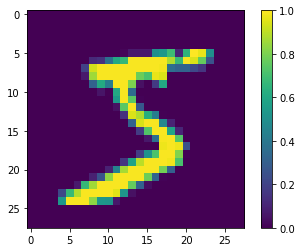

In [28]:
print(f"first image: {train_labels[0]}")

plt.imshow(train_images[0])
plt.colorbar()
plt.show()

### Data Preprocessing
##### Check dtype, min/max

In [8]:
# get images min max value
print(min(train_images.reshape(-1)), max(train_images.reshape(-1)))
print(min(test_images.reshape(-1)), max(test_images.reshape(-1)))

0 255
0 255


In [9]:
# get labels' min max value
print(min(train_labels.reshape(-1)), max(train_labels.reshape(-1)))
print(min(test_labels.reshape(-1)), max(test_labels.reshape(-1)))

0 9
0 9


In [10]:
# check data types of train/test data
train_images.dtype

dtype('uint8')

In [11]:
# change int to float
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [12]:
print(train_images.dtype, test_images.dtype)

float64 float64


##### Normalizing
$$normalize(x) =  \frac{x - min}{max - min}$$

- our min is 0, so divide it by 255 is fine for this data set

In [13]:
# normalizing the data.
train_images /= 255
test_images /= 255

In [14]:
# get normalized images min max value
print(min(train_images.reshape(-1)), max(train_images.reshape(-1)))
print(min(test_images.reshape(-1)), max(test_images.reshape(-1)))

0.0 1.0
0.0 1.0


In [15]:
# check normalized data types of train/test data
train_images.dtype

dtype('float64')

### Visualization

In [24]:
train_images[0:10].shape

(10, 28, 28)

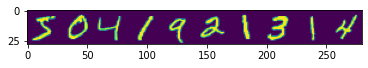

In [17]:
plt.imshow(np.hstack(train_images[:10]))
plt.show()

In [25]:
train_images[:10].transpose((1,0,2)).reshape(28,-1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

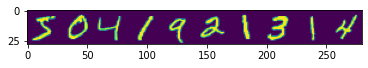

[5 0 4 1 9 2 1 3 1 4]


In [29]:
plt.imshow(train_images[:10].transpose((1,0,2)).reshape(28,-1))
plt.show()
print(train_labels[:10])

##### Visualization as Dark

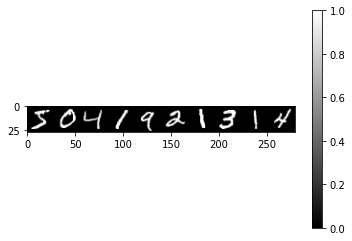

[5 0 4 1 9 2 1 3 1 4]


In [31]:
plt.imshow(train_images[:10].transpose((1,0,2)).reshape(28,-1), cmap='gray')
plt.colorbar()
plt.show()
print(train_labels[:10])

### Data Augmentation

In [32]:
for _ in range(3):
    print(np.random.random())

0.04046668323227831
0.6496419313366493
0.2216370560556119


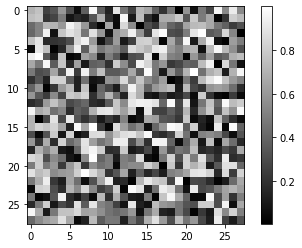

In [37]:
plt.imshow(np.random.random((28,28)), cmap='gray')
plt.colorbar()
plt.show()

In [41]:
# gaussian
for _ in range(3):
    print(np.random.normal(loc=0.0, scale=0.1)) # avg = 0.0 standard_deviation = 0.1

0.035859855146192075
-0.1042526858396148
-0.07112520101907374


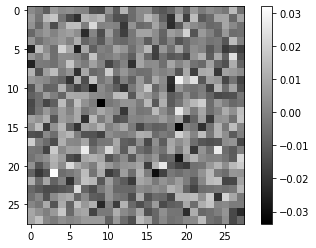

In [46]:
plt.imshow(np.random.normal(loc=0.0, scale=0.01, size=(28,28)), cmap = 'gray')
plt.colorbar()
plt.show()

In [64]:
# add noisy
noisy_image = train_images[5] + np.random.normal(loc=0.5, scale=0.1, size=(28,28))

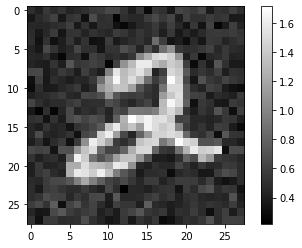

In [65]:
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

In [67]:
noisy_image[noisy_image > 1.0] = 1.0

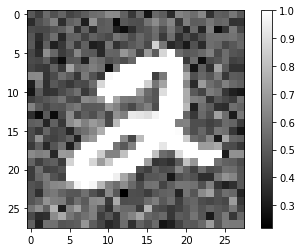

In [68]:
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

In [70]:
# add noisy to total, normalized
train_noisy_images = train_images + np.random.normal(loc=0.5, scale=0.1, size=train_images.shape)
test_noisy_images = test_images + np.random.normal(loc=0.5, scale=0.1, size=test_images.shape)

train_noisy_images[train_noisy_images > 1.0] = 1.0
test_noisy_images[test_noisy_images > 1.0] = 1.0

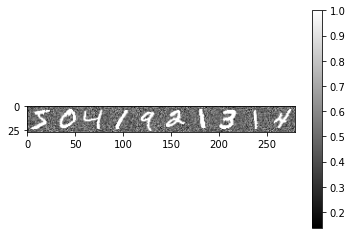

[5 0 4 1 9 2 1 3 1 4]


In [73]:
plt.imshow(train_noisy_images[:10].transpose((1,0,2)).reshape(28,-1), cmap='gray')
plt.colorbar()
plt.show()
print(train_labels[:10])

In [80]:
# one-hot-encoing to labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [83]:
test_labels.shape

(10000, 10)

### Modeling

In [96]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [97]:
inputs = Input(shape=(28,28))
x1 = SimpleRNN(units=64, activation="tanh")(inputs)
x2 = Dense(units=10, activation="softmax")(x1)
model = Model(inputs=inputs, outputs=x2)

In [98]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                5952      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
hist = model.fit(x=train_noisy_images, y=train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 7s - loss: 0.6805 - accuracy: 0.7770 - val_loss: 0.4281 - val_accuracy: 0.8741
Epoch 2/5
1875/1875 - 6s - loss: 0.3763 - accuracy: 0.8867 - val_loss: 0.2996 - val_accuracy: 0.9091
Epoch 3/5
1875/1875 - 6s - loss: 0.3026 - accuracy: 0.9114 - val_loss: 0.2368 - val_accuracy: 0.9282
Epoch 4/5
1875/1875 - 6s - loss: 0.2707 - accuracy: 0.9199 - val_loss: 0.2179 - val_accuracy: 0.9353
Epoch 5/5
1875/1875 - 6s - loss: 0.2510 - accuracy: 0.9264 - val_loss: 0.2245 - val_accuracy: 0.9358


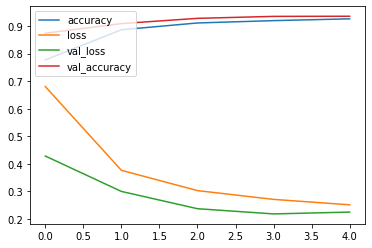

In [105]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

### Check Result

In [119]:
res = model.predict(test_noisy_images[0:1])
res

array([[2.6132697e-05, 2.6024809e-05, 6.0160684e-05, 1.0804295e-03,
        9.2121400e-07, 4.4215725e-05, 5.4156434e-08, 9.9693108e-01,
        3.4197171e-06, 1.8276433e-03]], dtype=float32)

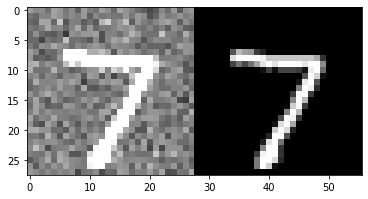

In [118]:
plt.imshow(np.concatenate([test_noisy_images[0], test_images[0]], axis=1), cmap='gray')
plt.show()

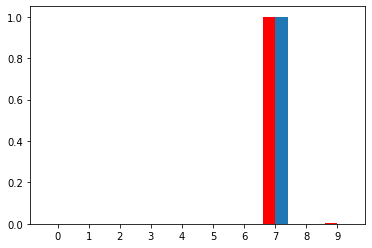

In [137]:
plt.bar(np.array(range(10))-0.2, res[0], color='red', width=0.4)
plt.bar(np.array(range(10))+0.2, test_labels[0],width=0.4)
plt.xticks(range(10))
plt.show()

### Model Save and Load, Download

In [141]:
# save
model.save(filepath='./01.models')

INFO:tensorflow:Assets written to: ./01.models/assets


In [144]:
# load
new_model = tf.keras.models.load_model(filepath='./01.models')

In [145]:
res = new_model.predict(test_noisy_images[0:1])
res

array([[2.6132697e-05, 2.6024809e-05, 6.0160684e-05, 1.0804295e-03,
        9.2121400e-07, 4.4215725e-05, 5.4156434e-08, 9.9693108e-01,
        3.4197171e-06, 1.8276433e-03]], dtype=float32)

In [146]:
loss, acc = new_model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)

313/313 - 1s - loss: 0.2245 - accuracy: 0.9358
0.22454416751861572 0.9358000159263611


In [147]:
loss, acc = model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)

313/313 - 0s - loss: 0.2245 - accuracy: 0.9358
0.22454416751861572 0.9358000159263611
